## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


def build_mlp_input(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    #input_layer = BatchNormalization()(input_layer)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            #x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


def build_mlp_out(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            #x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            #x = BatchNormalization()(x)
    x = BatchNormalization()(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
# BATCH_SIZE = [2, 16, 32, 128, 256, 1024]
BATCH_SIZE = [128, 256, 1024]
MOMENTUM = 0.95

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
def run_model(model, batch_size):
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    return model

def save_result(model, name):
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-bs-%s" % str(name)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

# 作業1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
for batch_size in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with BATCH_SIZE = %.6f" % (batch_size))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model = run_model(model, batch_size)
    save_result(model, str(batch_size))


batch_size = BATCH_SIZE[-1]

# 作業2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
keras.backend.clear_session() # 把舊的 Graph 清掉
print("2nd Experiment with BATCH_SIZE = %.6f" % (batch_size))
model = build_mlp_input(input_shape=x_train.shape[1:])
model.summary()
model = run_model(model, batch_size)
save_result(model, str(batch_size)+'_2nd')


# 作業3. 請於 BN 放在 Input Layer 後，並比較結果
keras.backend.clear_session() # 把舊的 Graph 清掉
print("3nd Experiment with BATCH_SIZE = %.6f" % (batch_size))
model = build_mlp_out(input_shape=x_train.shape[1:])
model.summary()
model = run_model(model, batch_size)
save_result(model, str(batch_size)+'_3rd')




Experiment with BATCH_SIZE = 128.000000


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (N

50000/50000 [==============================] - 7s 133us/step - loss: 0.4273 - acc: 0.8530 - val_loss: 2.3112 - val_acc: 0.4507
Epoch 38/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.4086 - acc: 0.8585 - val_loss: 2.0366 - val_acc: 0.4825
Epoch 39/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.3882 - acc: 0.8671 - val_loss: 2.1331 - val_acc: 0.4665
Epoch 40/50
50000/50000 [==============================] - 7s 131us/step - loss: 0.3838 - acc: 0.8670 - val_loss: 2.3332 - val_acc: 0.4501
Epoch 41/50
50000/50000 [==============================] - 7s 132us/step - loss: 0.3636 - acc: 0.8744 - val_loss: 2.1147 - val_acc: 0.4798
Epoch 42/50
50000/50000 [==============================] - 7s 134us/step - loss: 0.3529 - acc: 0.8776 - val_loss: 2.1816 - val_acc: 0.4801
Epoch 43/50
50000/50000 [==============================] - 7s 133us/step - loss: 0.3346 - acc: 0.8854 - val_loss: 2.2544 - val_acc: 0.4734
Epoch 44/50
50000/50000 [==============

50000/50000 [==============================] - 5s 91us/step - loss: 0.3975 - acc: 0.8737 - val_loss: 1.9647 - val_acc: 0.4837
Epoch 36/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3718 - acc: 0.8840 - val_loss: 1.9932 - val_acc: 0.4716
Epoch 37/50
50000/50000 [==============================] - 4s 87us/step - loss: 0.3488 - acc: 0.8937 - val_loss: 2.0722 - val_acc: 0.4579
Epoch 38/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.3408 - acc: 0.8930 - val_loss: 2.0804 - val_acc: 0.4636
Epoch 39/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.3196 - acc: 0.9035 - val_loss: 2.1561 - val_acc: 0.4632
Epoch 40/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.2997 - acc: 0.9089 - val_loss: 2.1318 - val_acc: 0.4705
Epoch 41/50
50000/50000 [==============================] - 4s 89us/step - loss: 0.2863 - acc: 0.9136 - val_loss: 2.2524 - val_acc: 0.4644
Epoch 42/50
50000/50000 [=====================

Epoch 34/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.7723 - acc: 0.7522 - val_loss: 1.5159 - val_acc: 0.4940
Epoch 35/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7513 - acc: 0.7589 - val_loss: 1.5202 - val_acc: 0.4948
Epoch 36/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7331 - acc: 0.7658 - val_loss: 1.5319 - val_acc: 0.4930
Epoch 37/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.7140 - acc: 0.7755 - val_loss: 1.5552 - val_acc: 0.4835
Epoch 38/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.6962 - acc: 0.7819 - val_loss: 1.5506 - val_acc: 0.4892
Epoch 39/50
50000/50000 [==============================] - 3s 54us/step - loss: 0.6781 - acc: 0.7871 - val_loss: 1.5684 - val_acc: 0.4882
Epoch 40/50
50000/50000 [==============================] - 3s 55us/step - loss: 0.6616 - acc: 0.7934 - val_loss: 1.5719 - val_acc: 0.4921
Epoch 41/50
50000/50000 [=========

50000/50000 [==============================] - 2s 48us/step - loss: 1.0204 - acc: 0.6506 - val_loss: 1.3848 - val_acc: 0.5167
Epoch 35/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.0067 - acc: 0.6560 - val_loss: 1.3727 - val_acc: 0.5189
Epoch 36/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9907 - acc: 0.6636 - val_loss: 1.3820 - val_acc: 0.5178
Epoch 37/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9776 - acc: 0.6681 - val_loss: 1.3750 - val_acc: 0.5205
Epoch 38/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9627 - acc: 0.6725 - val_loss: 1.3712 - val_acc: 0.5190
Epoch 39/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9491 - acc: 0.6780 - val_loss: 1.3792 - val_acc: 0.5164
Epoch 40/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9348 - acc: 0.6833 - val_loss: 1.3758 - val_acc: 0.5198
Epoch 41/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 49us/step - loss: 1.0268 - acc: 0.6496 - val_loss: 1.4107 - val_acc: 0.5000
Epoch 35/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.0112 - acc: 0.6542 - val_loss: 1.4123 - val_acc: 0.5038
Epoch 36/50
50000/50000 [==============================] - 2s 48us/step - loss: 0.9995 - acc: 0.6576 - val_loss: 1.4295 - val_acc: 0.4945
Epoch 37/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.9850 - acc: 0.6639 - val_loss: 1.4160 - val_acc: 0.4994
Epoch 38/50
50000/50000 [==============================] - 2s 50us/step - loss: 0.9702 - acc: 0.6692 - val_loss: 1.4019 - val_acc: 0.5038
Epoch 39/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.9520 - acc: 0.6758 - val_loss: 1.4370 - val_acc: 0.5066
Epoch 40/50
50000/50000 [==============================] - 2s 49us/step - loss: 0.9375 - acc: 0.6833 - val_loss: 1.4395 - val_acc: 0.5027
Epoch 41/50
50000/50000 [=====================

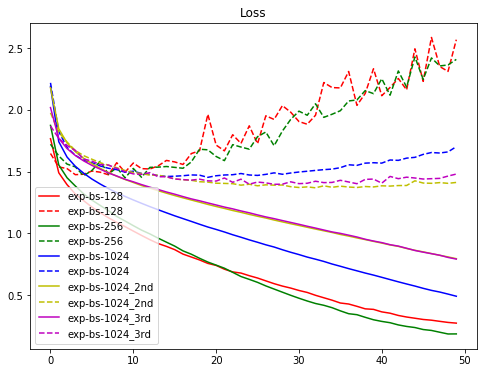

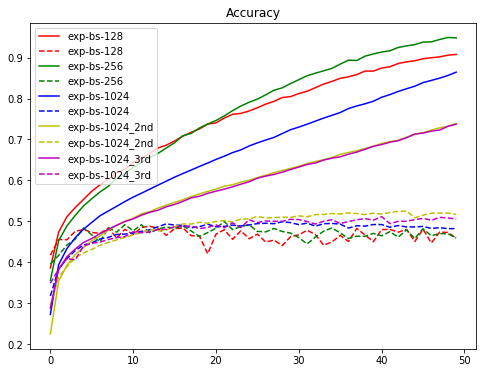

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()